# Análise de gastos dos Deputados Federais
Objetivo: Armazenar os gastos (até o momento) por deputado federal.
1. Obter os dados;
2. Efetuar os ajustes necessários;
3. Armazenar o sqlite.
link-> https://dadosabertos.camara.leg.br/swagger/api.html  

Bases: /deputados Listagem e busca de deputados, segundo critérios;
       / deputados/{id}/despesas As despesas com exercício parlamentar do deputado.

In [1]:
# Instalando as bibliotecas
import pandas as pd
import requests
from pandas.io import sql

In [2]:
# Consumir a API
url = "https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome"

In [3]:
# Armazenar os dados da API na variável resultado
resultado = requests.get(url)

In [4]:
# Exbibir o resultado em formato json da variável resultado
resultado.json()

{'dados': [{'id': 220593,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220593',
   'nome': 'Abilio Brunini',
   'siglaPartido': 'PL',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37906',
   'siglaUf': 'MT',
   'idLegislatura': 57,
   'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/220593.jpg',
   'email': 'dep.abiliobrunini@camara.leg.br'},
  {'id': 204379,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204379',
   'nome': 'Acácio Favacho',
   'siglaPartido': 'MDB',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/36899',
   'siglaUf': 'AP',
   'idLegislatura': 57,
   'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204379.jpg',
   'email': 'dep.acaciofavacho@camara.leg.br'},
  {'id': 220714,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220714',
   'nome': 'Adail Filho',
   'siglaPartido': 'REPUBLICANOS',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v

In [5]:
# Armazenar esses dados no DataFrame do pandas para melhor visualização
deputados = pd.DataFrame(resultado.json()['dados'])

In [6]:
# Exbixir as cinco primeiras linhas
deputados.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


In [7]:
# Visualizar a quantidade de linhas e colunas
deputados.shape

(513, 9)

# Explicando o código abaixo
**Inicialização da lista gastos:** Uma lista vazia chamada gastos é inicializada. Esta lista será usada para armazenar os DataFrames de despesas de cada deputado.
**Loop for sobre os IDs dos deputados:** Para cada ID de deputado na coluna id do DataFrame deputados, o código executa as seguintes etapas:
**Construção da URL da API:** Cria uma URL para consultar as despesas do deputado correspondente ao ID atual. A URL é construída concatenando-se a URL base "https://dadosabertos.camara.leg.br/api/v2/" com "deputados/", o ID do deputado convertido para string e "/despesas?ordem=ASC&ano=2023". Isso define a URL da API que será consultada para obter as despesas do deputado no ano de 2023.
**Consulta à API:** Usa a biblioteca requests para enviar uma solicitação GET à URL da API e obter a resposta.
**Conversão da resposta para DataFrame:** Converte a resposta JSON da API em um DataFrame do Pandas chamado gasto.
**Adição do ID do deputado ao DataFrame:** Adiciona uma coluna id ao DataFrame gasto com o valor do ID do deputado atual.
**Adição do DataFrame à lista gastos:** Adiciona o DataFrame gasto à lista gastos.

In [8]:
gastos = []
for id in deputados.id:
    url_despesa = "https://dadosabertos.camara.leg.br/api/v2/"
    url_despesa = url_despesa + "deputados/"+str(id)+"/despesas?ordem=ASC&ano=2023"
    resposta = requests.get(url_despesa)
    gasto = pd.DataFrame(resposta.json()['dados'])
    gasto['id'] = id
    gastos.append(gasto)

In [9]:
# Ver o tamanho da lista
len(gastos)

513

In [10]:
# Ver o tamanho da lsita na posição [0]
len(gastos[0])

15

In [11]:
gastos[0]

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2023,9,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066,Nota Fiscal Eletrônica,4,2023-09-19,35537,52.98,http://www.camara.leg.br/cota-parlamentar/nota...,3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELA...,42999796000188,52.98,0.0,,1969221,0,220593
1,2023,11,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491,Nota Fiscal,0,2023-11-27,01,67.30,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,1996163,0,220593
2,2023,5,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7552621,Nota Fiscal,0,2023-05-05,11533052023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1938600,0,220593
3,2023,6,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587236,Recibos/Outros,1,2023-06-05,11533062023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1957493,0,220593
4,2023,7,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587239,Nota Fiscal,0,2023-07-05,11533072023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1957494,0,220593
5,2023,8,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7605225,Nota Fiscal,0,2023-08-25,11533082023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1966665,0,220593
6,2023,9,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7625750,Nota Fiscal,0,2023-09-06,11533092023001,118.15,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,118.15,0.0,,1978242,0,220593
7,2023,12,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7671693,Nota Fiscal,0,2023-12-26,11533122023001,67.30,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,2003936,0,220593
8,2023,4,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7538426,Nota Fiscal,0,2023-04-25,s/n,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1931086,0,220593
9,2023,5,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7553466,Nota Fiscal,0,2023-06-02,32,1500.00,https://www.camara.leg.br/cota-parlamentar/doc...,BRASIL ONE SERVICOS DE TECNOLOGIA DA INFORMACA...,18804888000180,1500.00,0.0,,1939100,0,220593


### Transformação dos dados
Este código utiliza a **função concat** do Pandas para concatenar todos os DataFrames presentes na **lista gastos** em um único DataFrame. Quando você executa pd.concat(gastos), o Pandas concatena os DataFrames da lista ao longo do eixo especificado (por padrão, axis=0, ou seja, ao longo das linhas) e retorna o DataFrame resultante. Neste caso, como a lista gastos contém DataFrames de despesas de cada deputado, o DataFrame total resultante conterá todas essas despesas em um único DataFrame, facilitando a análise e manipulação dos dados de despesas dos deputados.

In [12]:
# Concatenando os dados da lista gastos em um único DataFrame
total = pd.concat(gastos)

In [13]:
# Verificando os cinco primeitos itens do DataFrame total
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066.0,Nota Fiscal Eletrônica,4.0,2023-09-19,35537,52.98,http://www.camara.leg.br/cota-parlamentar/nota...,3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELA...,42999796000188,52.98,0.0,,1969221.0,0.0,220593
1,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491.0,Nota Fiscal,0.0,2023-11-27,01,67.30,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,1996163.0,0.0,220593
2,2023.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7552621.0,Nota Fiscal,0.0,2023-05-05,11533052023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1938600.0,0.0,220593
3,2023.0,6.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587236.0,Recibos/Outros,1.0,2023-06-05,11533062023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1957493.0,0.0,220593
4,2023.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587239.0,Nota Fiscal,0.0,2023-07-05,11533072023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,,1957494.0,0.0,220593


In [14]:
#  Verificando de forma aleatória os cinco deputados através da função sample()
total.sample(5)

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
12,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7627367.0,Nota Fiscal,0.0,2023-09-23,275852676,228.00,https://www.camara.leg.br/cota-parlamentar/doc...,Companhia Energética de Pernambuco,10835932000108,228.00,0.0,,1979082.0,0.0,220663
14,2023.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7580163.0,Recibos/Outros,1.0,2023-07-30,SN,3000.00,https://www.camara.leg.br/cota-parlamentar/doc...,EDENILTON LIMA PEREIRA,30057078220,3000.00,0.0,,1953796.0,0.0,160591
6,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7671255.0,Nota Fiscal,0.0,2023-12-14,9577570,398.92,https://www.camara.leg.br/cota-parlamentar/doc...,Energiza - Centrais Elétricas de Rondônia,05914650000166,398.92,0.0,,2003682.0,0.0,220608
14,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7667022.0,Nota Fiscal,0.0,2023-12-09,74193381,81.44,https://www.camara.leg.br/cota-parlamentar/doc...,Copel Distribuição S.A.,04368898000106,81.44,0.0,,2001293.0,0.0,220704
8,2023.0,10.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7635887.0,Nota Fiscal,0.0,2023-10-24,0119062385,263.91,https://www.camara.leg.br/cota-parlamentar/doc...,CLARO NXT TELECOMUNICAÇÕES S.A.,66970229000167,263.91,0.0,,1983544.0,0.0,220635


In [15]:
# Verificando se a base tem valores ausentes
total.isnull().sum()

ano                    0
mes                    0
tipoDespesa            0
codDocumento           0
tipoDocumento          0
codTipoDocumento       0
dataDocumento          0
numDocumento           0
valorDocumento         0
urlDocumento         347
nomeFornecedor         0
cnpjCpfFornecedor      0
valorLiquido           0
valorGlosa             0
numRessarcimento       0
codLote                0
parcela                0
id                     0
dtype: int64

In [16]:
# Contar a quantidade de linhas em branco dessa variável
total.numRessarcimento.value_counts()

numRessarcimento
     7374
0     202
Name: count, dtype: int64

In [17]:
# Por tratar-se de variável que serã utilizada podemos exlcuir essa coluna
del total['numRessarcimento']

In [18]:
# Verificando após a exçlusão
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id
0,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066.0,Nota Fiscal Eletrônica,4.0,2023-09-19,35537,52.98,http://www.camara.leg.br/cota-parlamentar/nota...,3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELA...,42999796000188,52.98,0.0,1969221.0,0.0,220593
1,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491.0,Nota Fiscal,0.0,2023-11-27,01,67.30,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,67.30,0.0,1996163.0,0.0,220593
2,2023.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7552621.0,Nota Fiscal,0.0,2023-05-05,11533052023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,1938600.0,0.0,220593
3,2023.0,6.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587236.0,Recibos/Outros,1.0,2023-06-05,11533062023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,1957493.0,0.0,220593
4,2023.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587239.0,Nota Fiscal,0.0,2023-07-05,11533072023001,43.20,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,43.20,0.0,1957494.0,0.0,220593


In [19]:
# Verificando a colunas urlDocumento
total.urlDocumento.value_counts()

urlDocumento
https://www.camara.leg.br/cota-parlamentar/documentos/publ/2946/2023/7549076.pdf               2
http://www.camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=7596430    2
http://www.camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=7610066    1
http://www.camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=7656480    1
https://www.camara.leg.br/cota-parlamentar/documentos/publ/3247/2023/7497401.pdf               1
                                                                                              ..
https://www.camara.leg.br/cota-parlamentar/documentos/publ/1011/2023/7594089.pdf               1
https://www.camara.leg.br/cota-parlamentar/documentos/publ/1011/2023/7570717.pdf               1
https://www.camara.leg.br/cota-parlamentar/documentos/publ/1011/2023/7563287.pdf               1
https://www.camara.leg.br/cota-parlamentar/documentos/publ/1011/2023/7518718.pdf               1
http://www.camara

In [20]:
# Excluindo essa colunas
del total['urlDocumento']

In [21]:
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id
0,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066.0,Nota Fiscal Eletrônica,4.0,2023-09-19,35537,52.98,3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELA...,42999796000188,52.98,0.0,1969221.0,0.0,220593
1,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491.0,Nota Fiscal,0.0,2023-11-27,01,67.30,AGUAS CUIABA S.A,14995581000153,67.30,0.0,1996163.0,0.0,220593
2,2023.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7552621.0,Nota Fiscal,0.0,2023-05-05,11533052023001,43.20,AGUAS CUIABA S.A,14995581000153,43.20,0.0,1938600.0,0.0,220593
3,2023.0,6.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587236.0,Recibos/Outros,1.0,2023-06-05,11533062023001,43.20,AGUAS CUIABA S.A,14995581000153,43.20,0.0,1957493.0,0.0,220593
4,2023.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587239.0,Nota Fiscal,0.0,2023-07-05,11533072023001,43.20,AGUAS CUIABA S.A,14995581000153,43.20,0.0,1957494.0,0.0,220593


In [22]:
# Verificando valores duplicados
print(total.shape)
total.drop_duplicates()
print(total.shape)

(7576, 16)
(7576, 16)


In [23]:
# A função info() é um método do Pandas que fornece informações concisas sobre um DataFrame. 
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7576 entries, 0 to 14
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ano                7576 non-null   float64
 1   mes                7576 non-null   float64
 2   tipoDespesa        7576 non-null   object 
 3   codDocumento       7576 non-null   float64
 4   tipoDocumento      7576 non-null   object 
 5   codTipoDocumento   7576 non-null   float64
 6   dataDocumento      7576 non-null   object 
 7   numDocumento       7576 non-null   object 
 8   valorDocumento     7576 non-null   float64
 9   nomeFornecedor     7576 non-null   object 
 10  cnpjCpfFornecedor  7576 non-null   object 
 11  valorLiquido       7576 non-null   float64
 12  valorGlosa         7576 non-null   float64
 13  codLote            7576 non-null   float64
 14  parcela            7576 non-null   float64
 15  id                 7576 non-null   int64  
dtypes: float64(9), int64(1), object

In [24]:
# A função describe() é um método do Pandas que fornece estatísticas descritivas 
# para colunas numéricas de um DataFrame.
total.describe()

,ano,mes,codDocumento,codTipoDocumento,valorDocumento,valorLiquido,valorGlosa,codLote,parcela,id
count,7576.0,7576.000000,7.576000e+03,7576.000000,7576.000000,7576.000000,7576.000000,7.576000e+03,7576.000000,7576.000000
mean,2023.0,6.323126,7.376058e+06,1.160903,1989.949192,1974.339015,14.121559,1.900173e+06,0.000792,180997.299762
std,0.0,3.420285,1.219424e+06,1.579358,4967.061871,4951.462469,238.728583,3.158756e+05,0.028133,49592.894303
min,2023.0,1.000000,0.000000e+00,0.000000,-1384.120000,-1384.120000,0.000000,0.000000e+00,0.000000,62881.000000
25%,2023.0,3.000000,7.525758e+06,0.000000,200.830000,200.000000,0.000000,1.923956e+06,0.000000,160569.000000
50%,2023.0,6.000000,7.572328e+06,0.000000,500.000000,495.275000,0.000000,1.949610e+06,0.000000,204457.000000
75%,2023.0,9.000000,7.622386e+06,1.000000,1767.007500,1700.000000,0.000000,1.976453e+06,0.000000,220586.000000
max,2023.0,12.000000,7.703154e+06,4.000000,164900.000000,164900.000000,14050.000000,2.030172e+06,1.000000,227433.000000


In [25]:
total.nomeFornecedor.value_counts()

nomeFornecedor
AMORETTO CAFES EXPRESSO LTDA                                     431
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME                     249
CEMIG DISTRIBUIÇÃO S.A.                                          211
CELULAR FUNCIONAL                                                182
031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA         169
                                                                ... 
NETO EXTRAÇÃO DE MINERIO EIRELI-                                   1
FAMA PAPELARIA E VARIEDADES LTDA                                   1
AUTO POSTO CACHOEIRA LTDA.                                         1
C. A. GOMES FILHO - COMERCIO E REPRESENTACOES COMERCIAIS LTDA      1
RODINEI AGOSTINI                                                   1
Name: count, Length: 1275, dtype: int64

In [26]:
# Mostrando uma lista de fornecedores
[fornecedor for fornecedor in total.nomeFornecedor]

['3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELARIA LTDA',
 'AGUAS CUIABA S.A',
 'AGUAS CUIABA S.A',
 'AGUAS CUIABA S.A',
 'AGUAS CUIABA S.A',
 'AGUAS CUIABA S.A',
 'AGUAS CUIABA S.A',
 'AGUAS CUIABA S.A',
 'AGUAS CUIABA S.A',
 'BRASIL ONE SERVICOS DE TECNOLOGIA DA INFORMACAO LTDA DEXATEC',
 'BRASIL ONE SERVICOS DE TECNOLOGIA DA INFORMACAO LTDA DEXATEC',
 'BROAD BRASIL LTDA',
 'BROADBRASIL LTDA',
 'BROADBRASIL LTDA',
 'BROADBRASIL LTDA',
 'I. RODRIGUES DE ALMEIDA',
 'CELULAR FUNCIONAL',
 'CELULAR FUNCIONAL',
 'E VIEGAS FERREIRA LTDA',
 'EDVALDO FRANCISCO DE OLIVEIRA 49191160120',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VE

In [27]:
# Correção de alguns valores econtrados
[str(fornecedor).upper().replace("S.A.", "S.A").replace("S/A", "S.A") \
 for fornecedor in total.nomeFornecedor]

['3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELARIA LTDA',
 'AGUAS CUIABA S.A',
 'AGUAS CUIABA S.A',
 'AGUAS CUIABA S.A',
 'AGUAS CUIABA S.A',
 'AGUAS CUIABA S.A',
 'AGUAS CUIABA S.A',
 'AGUAS CUIABA S.A',
 'AGUAS CUIABA S.A',
 'BRASIL ONE SERVICOS DE TECNOLOGIA DA INFORMACAO LTDA DEXATEC',
 'BRASIL ONE SERVICOS DE TECNOLOGIA DA INFORMACAO LTDA DEXATEC',
 'BROAD BRASIL LTDA',
 'BROADBRASIL LTDA',
 'BROADBRASIL LTDA',
 'BROADBRASIL LTDA',
 'I. RODRIGUES DE ALMEIDA',
 'CELULAR FUNCIONAL',
 'CELULAR FUNCIONAL',
 'E VIEGAS FERREIRA LTDA',
 'EDVALDO FRANCISCO DE OLIVEIRA 49191160120',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VE

In [28]:
total.nomeFornecedor = [str(fornecedor).upper().replace("S.A.", "S.A").replace("S/A", "S.A") \
 for fornecedor in total.nomeFornecedor]

In [29]:
total.nomeFornecedor.value_counts()

nomeFornecedor
AMORETTO CAFES EXPRESSO LTDA                                     431
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME                     249
CEMIG DISTRIBUIÇÃO S.A                                           211
CELULAR FUNCIONAL                                                182
031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA         169
                                                                ... 
C. A. GOMES FILHO - COMERCIO E REPRESENTACOES COMERCIAIS LTDA      1
TOUR DE FORCE PAPELARIA E INFORMATI LTDA                           1
CANTINA DA MASSA EIRELI                                            1
AUTO POSTO CACHOEIRA LTDA.                                         1
BONA IMÓVEIS                                                       1
Name: count, Length: 1252, dtype: int64

### Carga

In [30]:
# Instalando a biblioteca para manipulação em banco de dados    
from sqlalchemy import create_engine

In [31]:
engine = create_engine('sqlite:///dados_abertos_deputados.db')

In [33]:
deputados.to_sql('deputados', engine)

513

In [34]:
total.to_sql('despesas_total', engine)

7576

### Análise

In [36]:
total = pd.read_sql("select * from despesas_total;", engine)

In [38]:
total.head()

,index,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id
0,0,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066.0,Nota Fiscal Eletrônica,4.0,2023-09-19,35537,52.98,3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELA...,42999796000188,52.98,0.0,1969221.0,0.0,220593
1,1,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491.0,Nota Fiscal,0.0,2023-11-27,01,67.30,AGUAS CUIABA S.A,14995581000153,67.30,0.0,1996163.0,0.0,220593
2,2,2023.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7552621.0,Nota Fiscal,0.0,2023-05-05,11533052023001,43.20,AGUAS CUIABA S.A,14995581000153,43.20,0.0,1938600.0,0.0,220593
3,3,2023.0,6.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587236.0,Recibos/Outros,1.0,2023-06-05,11533062023001,43.20,AGUAS CUIABA S.A,14995581000153,43.20,0.0,1957493.0,0.0,220593
4,4,2023.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587239.0,Nota Fiscal,0.0,2023-07-05,11533072023001,43.20,AGUAS CUIABA S.A,14995581000153,43.20,0.0,1957494.0,0.0,220593


In [39]:
deputados = pd.read_sql("select * from deputados", engine)

In [40]:
deputados.head()

,index,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


In [41]:
total = total.merge(deputados, on = ['id'])

In [42]:
total.head()

,index_x,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,...,id,index_y,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,0,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066.0,Nota Fiscal Eletrônica,4.0,2023-09-19,35537,52.98,...,220593,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,1,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491.0,Nota Fiscal,0.0,2023-11-27,01,67.30,...,220593,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
2,2,2023.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7552621.0,Nota Fiscal,0.0,2023-05-05,11533052023001,43.20,...,220593,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
3,3,2023.0,6.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587236.0,Recibos/Outros,1.0,2023-06-05,11533062023001,43.20,...,220593,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
4,4,2023.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587239.0,Nota Fiscal,0.0,2023-07-05,11533072023001,43.20,...,220593,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br


In [47]:
gastos_deputados = total.groupby(['nome']).sum()[['valorDocumento', 'valorLiquido']]

In [50]:
gastos_deputados = gastos_deputados.sort_values('valorDocumento', ascending=False)

In [51]:
gastos_deputados.head(10)

,valorDocumento,valorLiquido
nome,,
Eunício Oliveira,426525.79,426525.79
Giacobo,399579.50,399579.50
Glaustin da Fokus,332829.10,332829.10
Silas Câmara,292286.00,292286.00
Gustinho Ribeiro,261700.00,261700.00
Hercílio Coelho Diniz,260814.47,260814.47
Delegado Éder Mauro,217381.15,217381.15
Alberto Mourão,207285.91,207285.91
Altineu Côrtes,192900.00,192900.00


In [52]:
gastos_deputados.tail(10)

,valorDocumento,valorLiquido
nome,,
José Guimarães,2108.78,2108.78
David Soares,2034.13,2022.76
Ana Paula Leão,1998.64,1981.21
Coronel Meira,1969.11,1951.48
Daiana Santos,1793.02,1779.00
Paulinho Freire,1676.77,1550.49
Romero Rodrigues,1619.61,1513.72
Flávio Nogueira,1542.28,1526.48
Paulo Litro,970.06,970.06


In [53]:
%matplotlib inline

In [54]:
total.nomeFornecedor.value_counts()[:10]

nomeFornecedor
AMORETTO CAFES EXPRESSO LTDA                                431
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME                249
CEMIG DISTRIBUIÇÃO S.A                                      211
CELULAR FUNCIONAL                                           182
031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA    169
CLARO NXT TELECOMUNICAÇÕES S.A                              145
BROADBRASIL LTDA                                            141
COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA                135
COMPANHIA ENERGÉTICA DE PERNAMBUCO                          109
063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA       87
Name: count, dtype: int64

<Axes: xlabel='nomeFornecedor'>

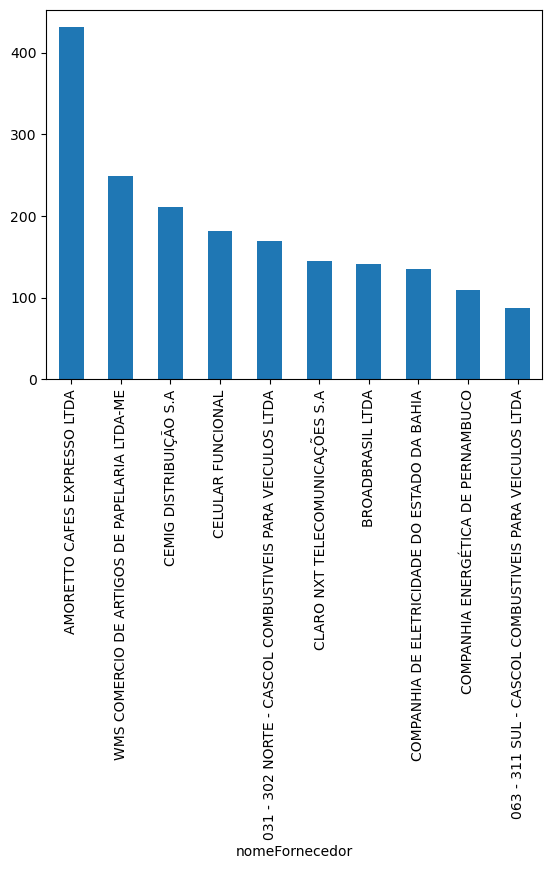

In [55]:
total.nomeFornecedor.value_counts()[:10].plot(kind="bar")